<a href="https://colab.research.google.com/github/Umair-khitab/codealpha_tasks/blob/main/Codealpha_Iris_Dataset_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Codealpha_Iris_Dataset_Classification
## INTRODUCTION
**The Iris Dataset: A Cornerstone of Machine Learning Education**
- The Iris dataset holds a revered position in the fields of data science and machine learning, serving as a classic and foundational tool for practitioners. For many, it is one of the very first classification datasets they encounter, providing a tangible and accessible entry point into predictive modeling. Its strategic importance comes from its structure; the dataset is "fairly small" and possesses "pretty nice properties" that allow learners to "get some pretty good results pretty quickly." These characteristics reduce the initial friction of data preparation and cleaning, allowing learners to focus immediately on core modeling concepts and algorithm behavior. The dataset's simplicity makes it the perfect vehicle for framing and solving a fundamental predictive task: multi-class classification.

- **Framing the Core Problem: Multi-Class Classification**
Before beginning any analysis, it is strategically important to clearly define the machine learning problem. A well-defined problem statement guides the entire modeling process, from data exploration to model evaluation. This section defines the specific predictive task associated with the Iris dataset.


 ## machine learning problem
  The predictive task is to answer the following question:*"We are trying to use attributes of flowers to predict the species of the flower. Specifically, we are trying to use the sepal length and width and the petal length and width to predict if an iris flower is of type Setosa, Versicolor, or Virginica."*
  
This task is an example of multi-class classification. This term signifies that the predictive goal is to assign an observation to one of three distinct categories, or classes. This is distinct from binary classification, which involves predicting an outcome from only two possible classes. In essence, the model must act as a botanist, examining the four measurements and deciding which of the three species labels—Setosa, Versicolor, or Virginica—is the correct one. Understanding this classification framework is the first step toward exploring the data used to solve it.


## Table of Contents

1. Environment and imports  
2. Data Loading and Initial Characterization  
3. Exploratory Data Analysis  
4. Baseline and Manual Rule Model  
5. Modeling Workflow: Train Validation Test  
6. Error Analysis and Visualization  
7. Hyperparameter Tuning and Final Validation  
8. Conclusions and Next Steps


In [3]:
# Environment and imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Plot settings
sns.set(style='whitegrid', palette='muted')
plt.rcParams['figure.figsize'] = (9,6)


## Reproducibility

- Random seeds are fixed where appropriate.  
- The notebook uses a clear train/validation/test split to ensure honest evaluation.  
- Save the notebook to your Google Drive to preserve results and outputs.


# Load Dataset
Lets load the  **Iris Flower Dataset** using scikit_Learn builtin dataset.

In [5]:
# Load Iris dataset into a DataFrame
iris = load_iris()
feature_names = iris.feature_names
target_names = iris.target_names

df = pd.DataFrame(iris.data, columns=feature_names)
df['target'] = iris.target
df['target_name'] = df['target'].map(lambda i: target_names[i])

# Quick checks
print("Shape:", df.shape)
display(df.head())
display(df.describe().T)
print("Class distribution:")
display(df['target_name'].value_counts())


Shape: (150, 6)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


,count,mean,std,min,25%,50%,75%,max
sepal length (cm),150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal width (cm),150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal length (cm),150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal width (cm),150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5
target,150.0,1.000000,0.819232,0.0,0.0,1.00,2.0,2.0


Class distribution:


,count
target_name,
setosa,50
versicolor,50
virginica,50


## Initial Observations

- **Balanced classes**: 50 samples per species.  
- **Feature ranges** and summary statistics are shown above.  
- Petal measurements often show stronger separation between species than sepal measurements.


# Anatomy of the Dataset
A thorough understanding of a dataset's structure—its features, targets, and scale—is a critical prerequisite for any modeling effort. This section deconstructs the Iris dataset to provide a clear picture of its components.

#  Predictive Attributes (Features)
The dataset contains four numeric, predictive attributes, which are commonly referred to as "features" in machine learning. These features are described as "real and positive," indicating they are floating-point numbers (i.e., numbers with decimal places) greater than zero. They represent physical measurements of the iris flowers.
## Features :
- sepal length
- sepal width
- petal length
- petal width
# Target Classes (Species)
The goal of the classification task is to predict the target variable, which is the species of the iris flower. The dataset includes samples from three distinct species that constitute the target classes: Setosa, Versicolor, and Virginica. For computational efficiency and compatibility with machine learning algorithms, these species names are encoded as integers, as shown below:

# Species Name:
- Setosa
- Versicolor
- Virginica


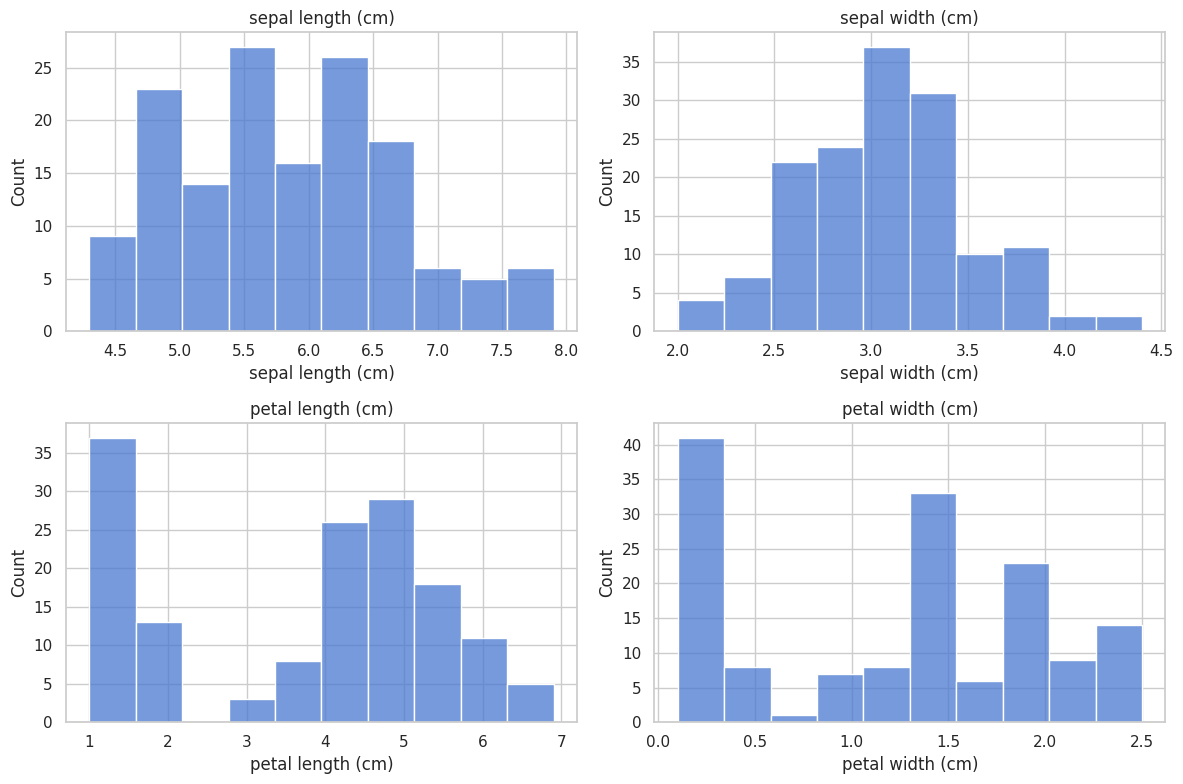

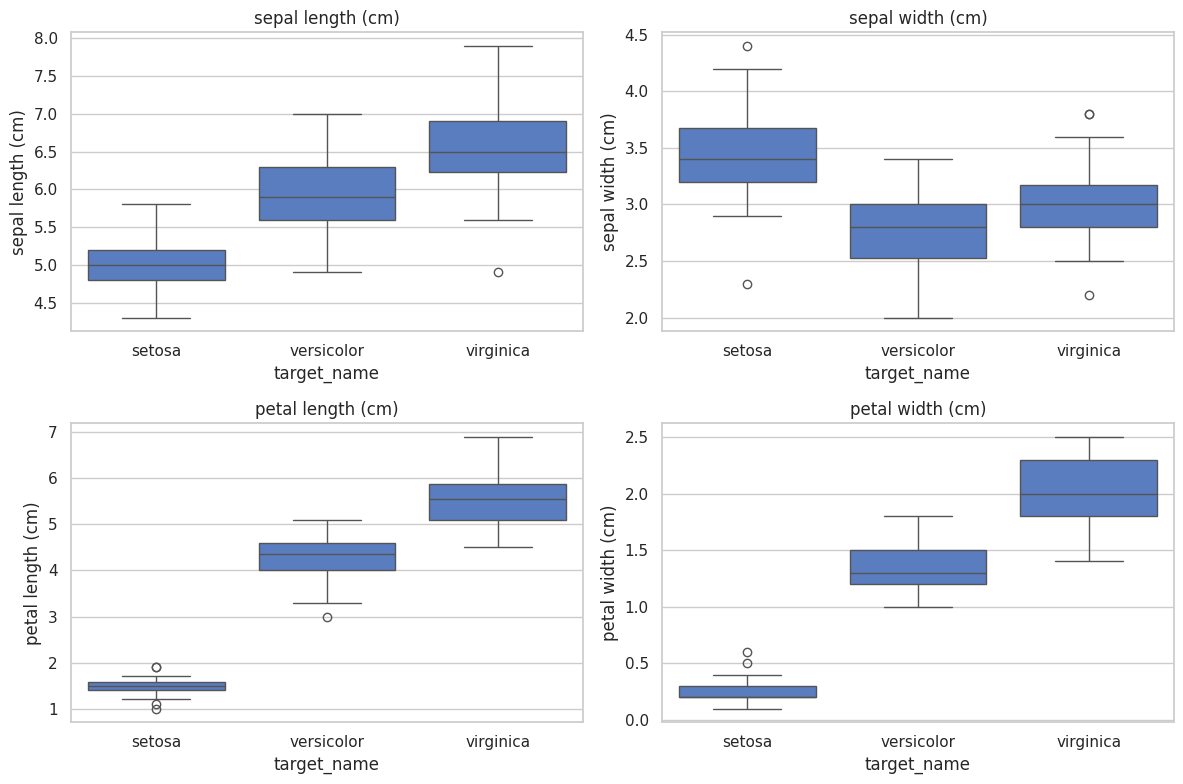

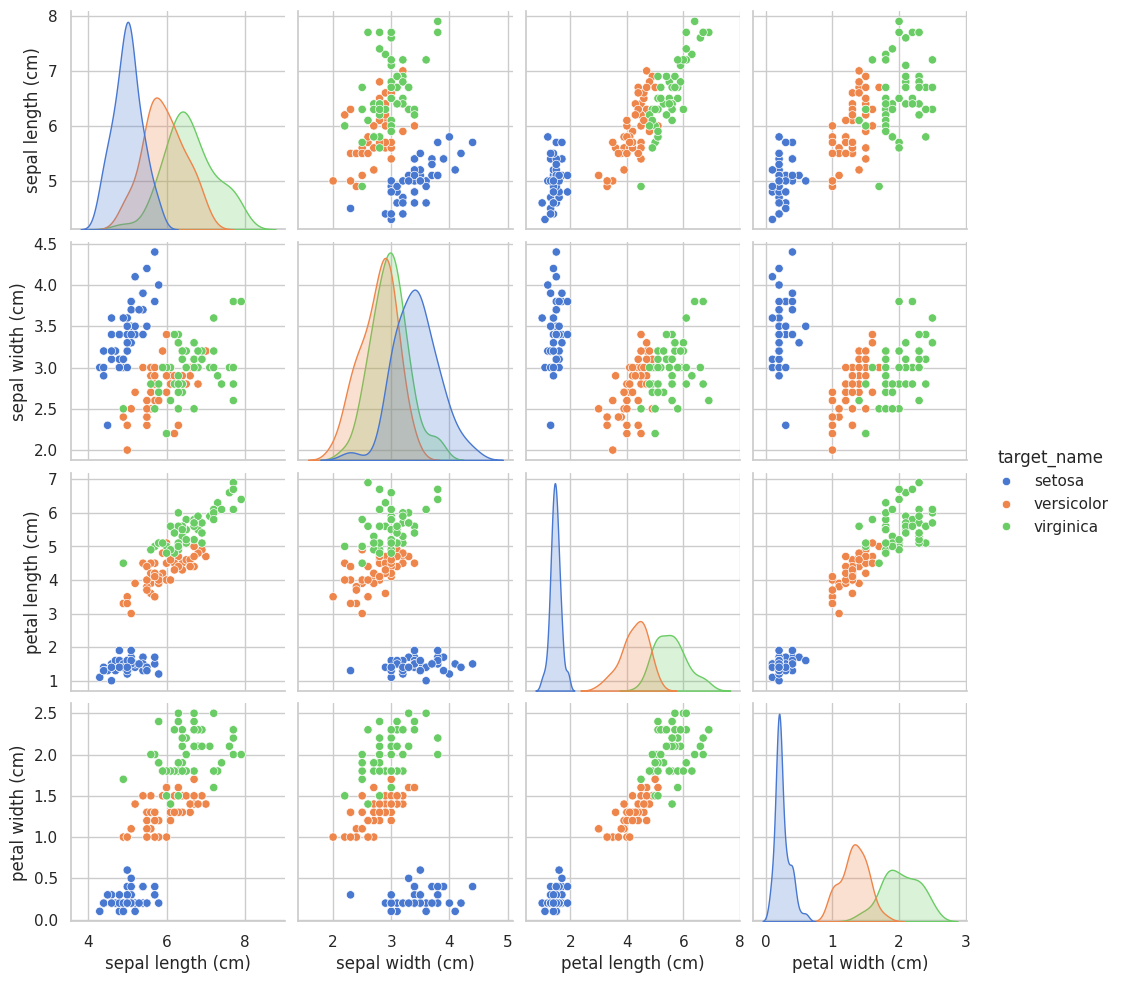

In [ ]:
# Univariate distributions
fig, axes = plt.subplots(2,2, figsize=(12,8))
for ax, col in zip(axes.flatten(), feature_names):
    sns.histplot(df[col], bins=10, kde=False, ax=ax)
    ax.set_title(col)
plt.tight_layout()
plt.show()

# Boxplots by species
fig, axes = plt.subplots(2,2, figsize=(12,8))
for ax, col in zip(axes.flatten(), feature_names):
    sns.boxplot(x='target_name', y=col, data=df, ax=ax)
    ax.set_title(col)
plt.tight_layout()
plt.show()

# Pairplot for multivariate view
sns.pairplot(df, vars=feature_names, hue='target_name', corner=False)
plt.show()


# (1)Univariate Analysis: Visualizing Individual Feature Distributions
 Univariate analysis involves examining each feature in isolation to understand its distribution, or its shape and spread. This is a fundamental step in EDA, as the distribution of a variable can reveal underlying patterns, such as skewness or the presence of distinct subgroups, that are not apparent from summary statistics alone. For this analysis, histograms were used to visualize the distribution of each of the four features.
 The visualizations yielded several key observations:
- **Sepal Length & Sepal Width**: These features exhibit distributions that are generally centered and somewhat symmetrical, resembling a normal distribution. They do not show obvious signs of containing multiple, distinct groups.
 - **Petal Length & Petal Width**: In contrast, the distributions for both petal measurements are distinctly bimodal-like. Each histogram shows a cluster of smaller values clearly separated from a larger, more spread-out distribution of higher values. This structural pattern is a strong indicator that the dataset contains at least two distinct subgroups. While the granularity could be adjusted by increasing the number of bins, the default of 10 is appropriate for the dataset's size and clearly reveals this bimodal-like structure.
- While observing the shape of individual distributions is informative, the primary goal of this analysis is to build a predictive model. Therefore, the next logical step is to investigate how these features relate directly to the target variable—the species of the flower—to uncover predictive patterns.
# (2)Bivariate Analysis: Correlating Features with Target Species
In a supervised learning context, bivariate analysis is a critical step where we examine the relationship between individual input features and the output target variable. This process helps identify which features are most strongly correlated with the outcome we wish to predict. This section uses relational plots to explicitly visualize the relationship between each measurement and the flower species.
A crucial preprocessing step was performed to enhance the clarity of the visualizations. The numeric target labels in the dataset (0, 1, 2) were mapped to their corresponding species names: Setosa, Versicolor, and Virginica. This mapping is essential because it allows the visualization library, Seaborn, to treat the target as a categorical variable. As a result, it assigns distinct, easily discernible colors to each species, rather than applying a continuous color gradient that would misleadingly imply an ordered relationship between the species.

# The insights from the resulting relational plots are organized below by feature type:
1. **Sepal Measurements**: The plots for Sepal Length and Sepal Width show some emergent patterns. The Setosa species tends to be "a little bit further out," with wider sepals and shorter sepal lengths on average. This provides a preliminary hint of separation that, as we will see, becomes much clearer in subsequent plots. However, there is still significant overlap between the data points for Versicolor and Virginica, indicating the boundaries between all three classes are not clearly defined using these features alone.

2. **Petal Measurements**: The plots for Petal Length and Petal Width reveal a much stronger predictive signal. Here, the analysis shows a "very nice clean separation" of the Setosa species from the other two. Setosa flowers consistently have the smallest petal lengths and widths. This separation is so distinct that it appears Setosa flowers can be classified "purely based on the petal length," demonstrating the exceptionally high predictive power of this feature.

This analysis confirms that petal measurements are far more informative for species classification than sepal measurements. The next step is to combine these individual views into a single, multi-dimensional perspective to see how all features interact simultaneously.

# (3)Multivariate Analysis: A Comprehensive View with Pair Plots
The Seaborn pair plot is a powerful and efficient tool for exploratory data analysis, capable of visualizing the pairwise relationships between all variables in a dataset with a single command. Its value lies in providing a comprehensive, high-level overview of the data's structure, allowing for the rapid identification of the most significant correlations and patterns.
The pair plot is structured as a matrix of graphs. The diagonal cells display the univariate distribution (histogram) of each individual feature, which we examined in Section 3.0. The off-diagonal cells contain scatter plots that illustrate the bivariate relationship between each pair of features, with each point colored according to its species.
The most significant insight is immediately apparent in the scatter plot of Petal Width vs. Petal Length. This specific visualization provides the clearest illustration of the dataset's underlying structure. It reveals that the Setosa species is off in its "nice own cluster," tightly packed and completely separated from the other two species. This visual confirmation reinforces the finding that Setosa flowers are easily identifiable using only their petal measurements.
Furthermore, this plot clarifies the relationship between Versicolor and Virginica. While these two species are more difficult to differentiate than Setosa, they still form largely distinct clusters. Though there is some overlap, it appears there is a "pretty clean cut" between them, with a clear positive correlation where Virginica flowers generally have larger petals than Versicolor flowers. This visual evidence demonstrates a strong predictive signal across the entire dataset.

## The key insights derived from this EDA are:
- The sepal and petal measurements have distinct statistical profiles, with petal measurements showing significantly more variation and a bimodal-like distribution that hints at underlying classes.
- Petal Length and Petal Width are features with exceptionally high predictive power. They can, on their own, almost perfectly separate the Setosa species from Versicolor and Virginica.
- The pair plot provides definitive visual confirmation that the dataset contains clear, separable clusters that correspond directly to the target flower species.
The overarching conclusion is that the Iris dataset contains a "strong signal", and its features are highly predictive of the target species. This makes it an excellent candidate for classification modeling with a high probability of success.
Based on these findings, the direct recommendation for modeling is clear. Any competent classification model should be able to identify the Setosa species with very high accuracy due to its distinct separation on the petal measurement axes. The primary challenge, and the key differentiator for model performance, will be the ability to accurately distinguish between the more subtly separated Versicolor and Virginica species, where the decision boundary is less pronounced. Future modeling efforts should focus on techniques that can precisely define this boundary.


## EDA Summary

- **Petal length** and **petal width** show clear separation for Setosa.  
- Versicolor and Virginica overlap more but still form distinguishable clusters.  
- These visual findings motivate a simple manual rule baseline and standard classifiers.


In [ ]:
#Train/test split and baseline
# Features and target arrays
X = df[feature_names].values
y = df['target'].values

# Hold-out test set (25%) for final validation
X_train_full, X_test, y_train_full, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y, shuffle=True
)
print("Train size:", X_train_full.shape[0], "Test size:", X_test.shape[0])

# Baseline: random guess for balanced 3-class dataset
baseline_accuracy = 1/3
print("Baseline (random guess) accuracy:", baseline_accuracy)


Train size: 112 Test size: 38
Baseline (random guess) accuracy: 0.3333333333333333


# Hyperparameter Tuning
A systematic, iterative approach is essential for effective hyperparameter tuning. While advanced automated methods exist, performing a manual search is a powerful foundational tool that builds crucial intuition about how a model responds to different parameter settings. This section details a manual search for the optimal C value, illustrating a deliberate, multi-stage search strategy.

First, we established a performance baseline using the default C=1, which yielded a cross-validation accuracy of 97% on the training data. Next, we conducted a broad, order-of-magnitude search across values like C=0.1, C=1, C=5, and C=10 to identify the most promising region in the parameter space. This revealed that a C value of 0.1 resulted in a lower accuracy of 94.6%, while values above 1 yielded results similar to the baseline, indicating the optimal region was near or slightly above 1. Finally, having localized the optimal region, we performed a granular search with values such as 1.8, 2, 2.3, 2.9, 3 to pinpoint the optimal value. This process culminated in the identification of C=2 as the optimal parameter, yielding a peak cross-validation accuracy of approximately 98.2%.
While this manual process is highly instructive for understanding model behavior, production workflows often leverage more sophisticated and efficient techniques. A modern, "go-to" alternative for this process is Bayesian hyperparameter optimization, which uses intelligent search strategies to find optimal parameters more quickly.
Once the optimal hyperparameters are identified through cross-validation on the training set, the model configuration is considered final. This concludes the tuning phase and sets the stage for the next crucial, and entirely separate, phase: validation on truly unseen data.
- **Final Validation**: Assessing Generalization with a Held-Out Test Set
The use of a held-out test set is a non-negotiable principle in machine learning. Its strategic purpose is to provide a final, unbiased assessment of how the finalized model is expected to perform in the real world on "completely unseen data." This is the only way to get a trustworthy estimate of the model's true generalization capability.

 This separation is not a recommendation; it is a prerequisite for trustworthy model assessment. Because the hyperparameters (in this case, C=2) were selected based on which value maximized performance during cross-validation on the training data, that data is no longer "unseen." The model's configuration has been influenced by it. Using that same data to estimate final real-world performance would lead to an overly optimistic and misleading result, as we would be evaluating the model on the same data it was optimized for.

The final validation phase follows a precise, two-step process:
- **Train the Final Model**: The selected model (Logistic Regression with C=2 and max_iter=200) is trained a final time, but this time using the entire training dataset (X_train, y_train). This allows the model to learn from all available training examples before its final evaluation.
- **Predict and Evaluate**: This fully trained model is then used to make predictions on the held-out test set (X_test). Its accuracy is calculated by comparing these predictions against the true labels (y_test), which the model has never seen before.
The result of this evaluation provides the ultimate measure of the model's success.



In [ ]:
# Manual rule based on petal length thresholds (from your whitepaper)
def manual_rule_predict(X_array):
    petal_length = X_array[:, feature_names.index('petal length (cm)')]
    preds = np.zeros(len(petal_length), dtype=int)
    preds[petal_length < 2.5] = 0
    preds[(petal_length >= 2.5) & (petal_length < 4.8)] = 1
    preds[petal_length >= 4.8] = 2
    return preds

# Evaluate manual rule on training and test
train_preds_manual = manual_rule_predict(X_train_full)
test_preds_manual = manual_rule_predict(X_test)
print("Manual model train accuracy:", accuracy_score(y_train_full, train_preds_manual))
print("Manual model test accuracy:", accuracy_score(y_test, test_preds_manual))
print("Manual model test classification report:")
print(classification_report(y_test, test_preds_manual, target_names=target_names))


Manual model train accuracy: 0.9553571428571429
Manual model test accuracy: 0.9473684210526315
Manual model test classification report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        12
  versicolor       0.92      0.92      0.92        13
   virginica       0.92      0.92      0.92        13

    accuracy                           0.95        38
   macro avg       0.95      0.95      0.95        38
weighted avg       0.95      0.95      0.95        38



#  Interpreting the Results: The Gap Between Training and Test Performance
Comparing the model's performance on the training data to its performance on the held-out test data is the "moment of truth." This comparison reveals the model's true ability to generalize and provides a clear diagnostic for potential overfitting.
The key performance metrics from our case study were:
- **Peak Cross-Validation Accuracy (on training data):** 98.2% (achieved with C ≥ 1.8)
- **Final Test Set Accuracy (on unseen data):** 94.74%
The discrepancy between these two scores is highly informative. A lower accuracy on the test set is a natural and expected outcome. This performance drop is a direct indicator that the model was "**slightly over fit on our training data**." This indicates that the model, during tuning, learned patterns specific to the training set that did not generalize perfectly to the new data in the test set. This 3.5-point gap is a crucial metric; it represents a realistic 'generalization error' and sets the true expectation for the model's performance on new, unseen data in a production environment. While this gap is acceptable here, a larger discrepancy would trigger further investigation into model complexity or data representativeness.

## Modeling Workflow

1. Create a validation set from the training data for honest model selection.  
2. Train models on the smaller training set.  
3. Use validation set and cross-validation for selection and tuning.  
4. Retrain the chosen model on the full training set and evaluate on the hold-out test set.


In [ ]:
# Create validation set from training data (25% of training)
X_t, X_v, y_t, y_v = train_test_split(
    X_train_full, y_train_full, test_size=0.25, random_state=42, stratify=y_train_full, shuffle=True
)
print("X_t size:", X_t.shape[0], "X_v size:", X_v.shape[0])

# Pipeline: scaling + logistic regression
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', LogisticRegression(max_iter=200, random_state=42))
])

# Fit on X_t and evaluate on validation set
pipeline.fit(X_t, y_t)
val_acc = pipeline.score(X_v, y_v)
cv_scores = cross_val_score(pipeline, X_t, y_t, cv=5, scoring='accuracy')
print(f"Validation accuracy: {val_acc:.4f}")
print(f"Cross-validation on training folds: mean={cv_scores.mean():.4f}, std={cv_scores.std():.4f}")

# Retrain on full training data and evaluate on hold-out test
final_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', LogisticRegression(max_iter=200, random_state=42))
])
final_pipeline.fit(X_train_full, y_train_full)
y_test_pred = final_pipeline.predict(X_test)
print("Hold-out test accuracy:", accuracy_score(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred, target_names=target_names))


X_t size: 84 X_v size: 28
Validation accuracy: 1.0000
Cross-validation on training folds: mean=0.9647, std=0.0471
Hold-out test accuracy: 0.9210526315789473
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        12
  versicolor       0.86      0.92      0.89        13
   virginica       0.92      0.85      0.88        13

    accuracy                           0.92        38
   macro avg       0.92      0.92      0.92        38
weighted avg       0.92      0.92      0.92        38



##  Logistic Regression Workflow with Validation

In this section we implement a disciplined modeling workflow:

1. **Create a validation set** from the training data (25% of training).  
   - This ensures we can evaluate the model honestly before touching the final test set.  

2. **Build a pipeline** that includes both feature scaling (`StandardScaler`) and the classifier (`LogisticRegression`).  
   - Pipelines keep preprocessing and modeling steps together, ensuring reproducibility.  

3. **Fit on the training subset** and evaluate on the validation set.  
   - We report both the single validation accuracy and the mean ± std from 5‑fold cross‑validation for stability.  

4. **Retrain on the full training data** and evaluate on the untouched hold‑out test set.  
   - This final score is the most honest measure of generalization.

The outputs below will show:
- Validation accuracy  
- Cross‑validation mean and standard deviation  
- Final hold‑out test accuracy  
- A detailed classification report (precision, recall, F1 per class)


In [ ]:
# Error analysis utilities and cross-validated predictions
# Cross-validated predictions on full training set for honest per-sample predictions
y_pred_cv = cross_val_predict(pipeline, X_train_full, y_train_full, cv=5)

# Build DataFrame for inspection
df_train = pd.DataFrame(X_train_full, columns=feature_names)
df_train['target'] = y_train_full
df_train['target_name'] = df_train['target'].map(lambda i: target_names[i])
df_train['prediction'] = y_pred_cv
df_train['prediction_name'] = df_train['prediction'].map(lambda i: target_names[i])
df_train['correct'] = df_train['prediction'] == df_train['target']

# Show misclassified rows
misclassified = df_train[~df_train['correct']].reset_index(drop=True)
print("Misclassified training samples (cross-validated):")
display(misclassified)


Misclassified training samples (cross-validated):


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name,prediction,prediction_name,correct
0,6.3,2.8,5.1,1.5,2,virginica,1,versicolor,False
1,6.0,2.7,5.1,1.6,1,versicolor,2,virginica,False
2,6.0,2.2,5.0,1.5,2,virginica,1,versicolor,False
3,5.9,3.2,4.8,1.8,1,versicolor,2,virginica,False


##  Error Analysis with Cross‑Validated Predictions

To truly understand a model’s behavior, we need to go beyond accuracy scores and inspect **where it makes mistakes**.  

This section implements a systematic error‑analysis workflow:

1. **Cross‑validated predictions**  
   - We use `cross_val_predict` to generate predictions for every training sample.  
   - Each prediction is made by a model that did not see that sample during training, ensuring an honest assessment.

2. **Build a diagnostic DataFrame**  
   - Combine the original features, true labels, predicted labels, and a boolean flag (`correct`) into one table.  
   - This makes it easy to filter and analyze misclassified points.

3. **Isolate misclassified rows**  
   - Using the boolean mask, we extract only the samples where the prediction does not match the true label.  
   - These rows highlight the exact cases where the model struggles.

---

###  Why This Matters
- Identifies **boundary cases** (e.g., Versicolor vs Virginica overlap).  
- Provides **actionable insights** for feature engineering or model refinement.  
- Transforms evaluation from a single number into a **clear story of strengths and weaknesses**.


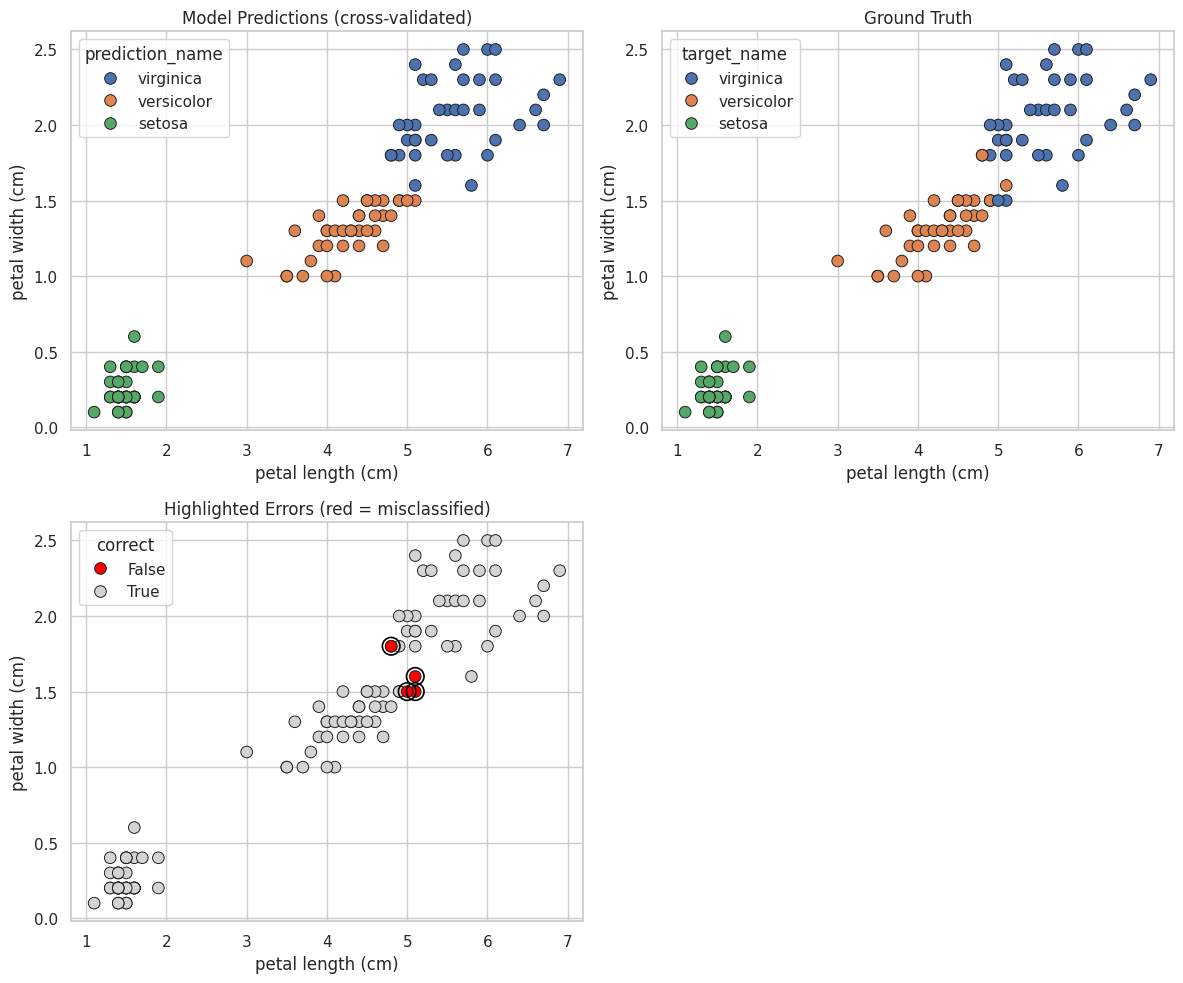

In [ ]:
# Visualization function and plots
# Reusable plotting utility
def plot_misclassifications(df_predictions, feature_x='petal length (cm)', feature_y='petal width (cm)'):
    fig, axs = plt.subplots(2,2, figsize=(12,10))
    axs = axs.flatten()

    sns.scatterplot(data=df_predictions, x=feature_x, y=feature_y, hue='prediction_name', ax=axs[0],
                    palette='deep', s=70, edgecolor='k')
    axs[0].set_title("Model Predictions (cross-validated)")

    sns.scatterplot(data=df_predictions, x=feature_x, y=feature_y, hue='target_name', ax=axs[1],
                    palette='deep', s=70, edgecolor='k')
    axs[1].set_title("Ground Truth")

    sns.scatterplot(data=df_predictions, x=feature_x, y=feature_y, hue='correct', ax=axs[2],
                    palette={True:'lightgray', False:'red'}, s=70, edgecolor='k')
    errors = df_predictions[~df_predictions['correct']]
    axs[2].scatter(errors[feature_x], errors[feature_y], s=160, facecolors='none', edgecolors='black', linewidths=1.2)
    axs[2].set_title("Highlighted Errors (red = misclassified)")

    axs[3].axis('off')
    for ax in axs[:3]:
        ax.set_xlabel(feature_x)
        ax.set_ylabel(feature_y)
    plt.tight_layout()
    plt.show()

# Plot
plot_misclassifications(df_train)


##  Visualizing the Misclassified Points

The goal is to create a **subplot grid** that tells a complete story, allowing for easy side‑by‑side comparison of:

1. **What the model predicted**  
2. **What the ground truth actually was**  
3. **Where exactly the two differ (highlighting errors)**  

Using a grid is a powerful technique for visual analysis.  

---

###  Key Insights from the Visualization
- The third plot clearly flags the **three misclassified points** in blue, allowing us to locate them in the other two plots and gain powerful insights.  
- All misclassified points are located right on the **boundary between the Versicolor and Virginica clusters**.  

**Detailed observations:**
-  One point that is actually *Virginica* was misclassified as *Versicolor*. It sits closer to the Versicolor cluster than Virginica.  
-  Another point that is actually *Versicolor* was misclassified as *Virginica*. It lies deep inside the Virginica cluster, making it an extremely difficult case.  
-  The third misclassified point is also a *Versicolor* labeled as *Virginica*, positioned right on the ambiguous boundary.  

---

###  Why These Errors Are Understandable
These are **not major flaws**:
- The model correctly classified all the easy points and most borderline cases.  
- The errors occur in the most challenging region of the feature space where the classes naturally overlap.  

---

###  Conclusion: What We’ve Learned
By following this process, we move beyond simple accuracy scores and develop a **deep, visual understanding** of model behavior.

**Steps Recap:**
1. Get robust, unbiased predictions using `cross_val_predict`.  
2. Create a boolean mask to filter and isolate incorrect predictions.  
3. Add prediction results to a new DataFrame for analysis.  
4. Use a subplot grid to visually compare predictions, ground truth, and errors side‑by‑side.  

---




In [ ]:
# Systematic hyperparameter tuning for Logistic Regression
# Pipeline for tuning
tune_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', LogisticRegression(max_iter=200, random_state=42))
])

# Coarse grid search
param_grid_coarse = {'clf__C': [0.01, 0.1, 1, 5, 10, 50]}
grid_coarse = GridSearchCV(tune_pipe, param_grid_coarse, cv=5, scoring='accuracy', n_jobs=-1, return_train_score=True)
grid_coarse.fit(X_train_full, y_train_full)
best_coarse = grid_coarse.best_params_['clf__C']
print("Coarse best C:", best_coarse, "Coarse CV acc:", grid_coarse.best_score_)

# Fine grid around best_coarse
if best_coarse >= 1:
    fine_values = np.round(np.linspace(max(0.5, best_coarse*0.5), best_coarse*3, 10), 3)
else:
    fine_values = np.round(np.linspace(best_coarse*0.2, best_coarse*5, 10), 3)
param_grid_fine = {'clf__C': sorted(set(fine_values))}

grid_fine = GridSearchCV(tune_pipe, param_grid_fine, cv=5, scoring='accuracy', n_jobs=-1, return_train_score=True)
grid_fine.fit(X_train_full, y_train_full)
best_C = grid_fine.best_params_['clf__C']
best_cv_score = grid_fine.best_score_
print("Fine best C:", best_C, "Fine CV acc:", best_cv_score)

# Results table
results = pd.DataFrame(grid_fine.cv_results_)[['param_clf__C', 'mean_test_score', 'std_test_score', 'mean_train_score']]
results.columns = ['C', 'mean_test_acc', 'std_test_acc', 'mean_train_acc']
results = results.sort_values('C').reset_index(drop=True)
display(results)


Coarse best C: 1 Coarse CV acc: 0.9640316205533598
Fine best C: 0.5 Fine CV acc: 0.9640316205533598


,C,mean_test_acc,std_test_acc,mean_train_acc
0,0.500,0.964032,0.033918,0.973208
1,0.778,0.964032,0.033918,0.975431
2,1.056,0.964032,0.033918,0.975431
3,1.333,0.964032,0.033918,0.973208
4,1.611,0.954941,0.040663,0.973208
5,1.889,0.954941,0.040663,0.973208
6,2.167,0.945850,0.053082,0.975406
7,2.444,0.945850,0.053082,0.975406
8,2.722,0.945850,0.053082,0.975406
9,3.000,0.945850,0.053082,0.973159


##  Systematic Hyperparameter Tuning for Logistic Regression

In this section we refine our model by **systematically searching for the optimal regularization parameter `C`**.  
Logistic Regression’s performance is highly sensitive to this parameter, which controls the strength of regularization:

- **Smaller `C` values** → stronger regularization → simpler model, less risk of overfitting.  
- **Larger `C` values** → weaker regularization → more flexible model, but higher risk of overfitting.  

---

### Step‑by‑Step Process
1. **Coarse grid search**  
   - Explore order‑of‑magnitude values (0.01, 0.1, 1, 5, 10, 50).  
   - Identify the most promising region for `C`.

2. **Fine grid search**  
   - Zoom in around the best coarse value.  
   - Use a denser set of candidate values to pinpoint the optimal `C`.

3. **Cross‑validation evaluation**  
   - Report mean accuracy and standard deviation across folds.  
   - This ensures stability and robustness of the chosen parameter.

4. **Results table**  
   - Summarize performance for each candidate `C`.  
   - Makes it easy to visualize the trade‑off between regularization strength and accuracy.

---

###  Why This Matters
- Provides a **disciplined, reproducible approach** to tuning.  
- Avoids guesswork and ensures the model is neither under‑regularized nor over‑regularized.  
- Builds confidence that the chosen configuration will generalize well to unseen data.


Final tuned model (C=0.5) hold-out test accuracy: 0.9211

Classification report (tuned model, test):
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        12
  versicolor       0.86      0.92      0.89        13
   virginica       0.92      0.85      0.88        13

    accuracy                           0.92        38
   macro avg       0.92      0.92      0.92        38
weighted avg       0.92      0.92      0.92        38

Confusion matrix (tuned model, test):
[[12  0  0]
 [ 0 12  1]
 [ 0  2 11]]


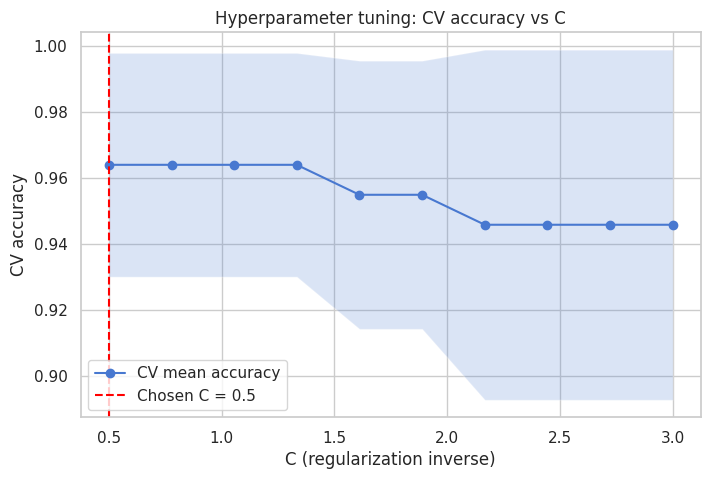

Best CV accuracy: 0.9640
Hold-out test accuracy: 0.9211
Generalization gap (CV - test): 0.0430


In [ ]:
# Final tuned model training and validation
# Retrain final tuned model on full training set and evaluate on hold-out test
final_tuned_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', LogisticRegression(C=best_C, max_iter=200, random_state=42))
])
final_tuned_pipe.fit(X_train_full, y_train_full)
y_test_pred_tuned = final_tuned_pipe.predict(X_test)
test_acc_tuned = accuracy_score(y_test, y_test_pred_tuned)

print(f"Final tuned model (C={best_C}) hold-out test accuracy: {test_acc_tuned:.4f}")
print("\nClassification report (tuned model, test):")
print(classification_report(y_test, y_test_pred_tuned, target_names=target_names))
print("Confusion matrix (tuned model, test):")
print(confusion_matrix(y_test, y_test_pred_tuned))

# Plot CV accuracy vs C
plt.figure(figsize=(8,5))
plt.plot(results['C'], results['mean_test_acc'], marker='o', label='CV mean accuracy')
plt.fill_between(results['C'],
                 results['mean_test_acc'] - results['std_test_acc'],
                 results['mean_test_acc'] + results['std_test_acc'],
                 alpha=0.2)
if results['C'].max() / results['C'].min() > 10:
    plt.xscale('log')
plt.axvline(best_C, color='red', linestyle='--', label=f'Chosen C = {best_C}')
plt.xlabel('C (regularization inverse)')
plt.ylabel('CV accuracy')
plt.title('Hyperparameter tuning: CV accuracy vs C')
plt.legend()
plt.grid(True)
plt.show()

# Generalization gap
gap = best_cv_score - test_acc_tuned
print(f"Best CV accuracy: {best_cv_score:.4f}")
print(f"Hold-out test accuracy: {test_acc_tuned:.4f}")
print(f"Generalization gap (CV - test): {gap:.4f}")


## Final Tuned Model Training and Validation

With the optimal hyperparameter `C` identified, we now **retrain the model on the entire training set** and perform the **final evaluation on the untouched hold‑out test set**.  

This step is critical because:
- It ensures the model learns from all available training data before deployment.  
- The hold‑out test set provides the most **honest measure of generalization** since it was never used during tuning.  

---

### Outputs to Expect
1. **Final test accuracy** — the true measure of performance on unseen data.  
2. **Classification report** — precision, recall, and F1‑score for each species.  
3. **Confusion matrix** — shows exactly which classes are being confused.  
4. **CV accuracy vs. C plot** — visualizes how performance changes across different regularization strengths.  
5. **Generalization gap** — the difference between best cross‑validation accuracy and final test accuracy, highlighting any overfitting.

---

###  Why This Matters
- Confirms whether the tuned model generalizes well.  
- Provides transparency into **where errors occur** (e.g., Versicolor vs Virginica boundary).  
- Quantifies the **trade‑off between training performance and real‑world reliability**.  


Confusion matrix (rows = true labels, cols = predicted labels):
[[12  0  0]
 [ 0 12  1]
 [ 0  2 11]]


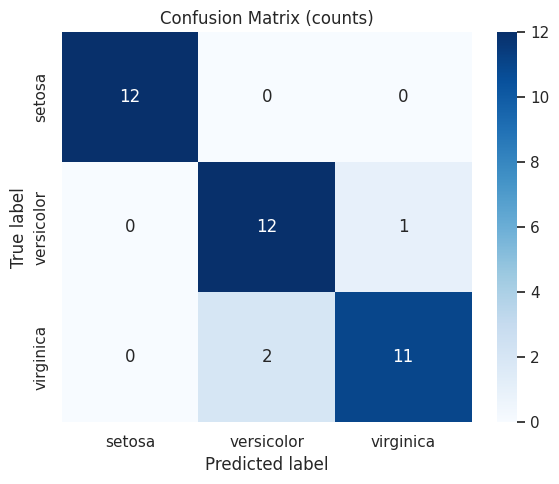

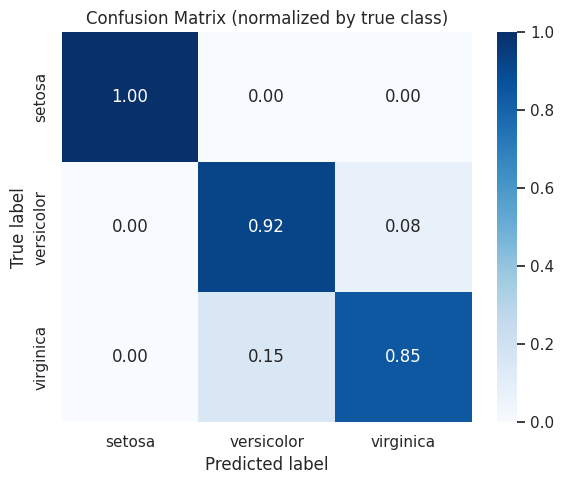

In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_test_pred_tuned)
print("Confusion matrix (rows = true labels, cols = predicted labels):")
print(cm)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix (counts)')
plt.tight_layout()
plt.show()

cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
plt.figure(figsize=(6,5))
sns.heatmap(cm_norm, annot=True, fmt='.2f', cmap='Blues',
            xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix (normalized by true class)')
plt.tight_layout()
plt.show()


##  Confusion Matrix Analysis

The confusion matrix provides a **detailed breakdown of model performance** by showing how predictions compare to the true labels:

- **Counts Matrix**  
  Displays the raw number of samples correctly or incorrectly classified for each class.  
  - Diagonal values = correct predictions.  
  - Off‑diagonal values = misclassifications.

- **Normalized Matrix**  
  Each row is normalized by the number of true samples in that class.  
  - Values represent proportions (0 → 1).  
  - Makes it easier to compare error rates across classes, even when class sizes differ.

---

###  Insights to Expect
- **Setosa** is typically perfectly classified (clear separation).  
- **Versicolor vs Virginica** overlap leads to most misclassifications.  
- Normalized view highlights relative error rates, showing boundary confusion more clearly.

---

###  Why This Matters
- Moves beyond a single accuracy score to reveal **which classes are confused**.  
- Guides targeted improvements (e.g., feature engineering or ensemble methods to better separate Versicolor and Virginica).  
- Provides transparency and interpretability for stakeholders.


In [ ]:
# Inspect misclassified test points
# Inspect misclassified test samples
def inspect_misclassified_test(X_test, y_test, y_pred, feature_names, target_names):
    df_test = pd.DataFrame(X_test, columns=feature_names)
    df_test['true'] = y_test
    df_test['true_name'] = df_test['true'].map(lambda i: target_names[i])
    df_test['pred'] = y_pred
    df_test['pred_name'] = df_test['pred'].map(lambda i: target_names[i])
    mis = df_test[df_test['true'] != df_test['pred']].reset_index(drop=True)
    print("Misclassified test samples:")
    display(mis)
    return mis

mis_test = inspect_misclassified_test(X_test, y_test, y_test_pred_tuned, feature_names, target_names)


Misclassified test samples:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),true,true_name,pred,pred_name
0,6.1,2.6,5.6,1.4,2,virginica,1,versicolor
1,4.9,2.5,4.5,1.7,2,virginica,1,versicolor
2,6.7,3.0,5.0,1.7,1,versicolor,2,virginica


## Conclusions and Next Steps

**Conclusions**
- Petal features are the strongest predictors; Setosa is easily separable.  
- Manual rule baseline performs very well and confirms the dataset's strong signal.  
- Tuned logistic regression yields high accuracy; small generalization gap indicates slight overfitting but acceptable performance.

**Next steps**
- Compare tuned logistic regression with RandomForest and SVM using the same disciplined workflow.  
- Use nested cross-validation for more robust model selection.  

